# IRIS Flower Prediction - LogisticRegresssion : ML (MultiClass Classification)

In [536]:
# Designed By : ALTAF HUSAIN DATA ANALYST

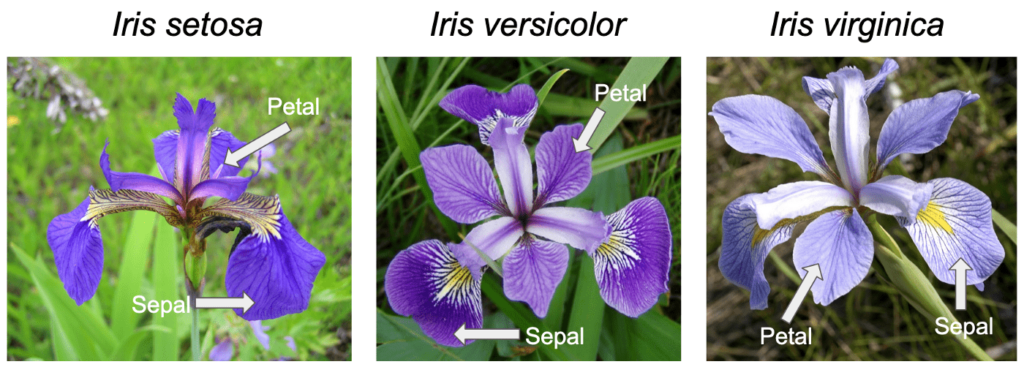

# Step 1 : load important modules

In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
print("All modules loaded succesfully")

All modules loaded succesfully


# Step 2 : load data


In [538]:
iris = load_iris()

In [539]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(dict(zip(range(0,3),iris.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [540]:
X = df.iloc[:,:-2]

In [541]:
y = df['target']

In [542]:
X.shape

(150, 4)

In [543]:
y.shape

(150,)

In [544]:
df.sample(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
58,6.6,2.9,4.6,1.3,1,versicolor
44,5.1,3.8,1.9,0.4,0,setosa
132,6.4,2.8,5.6,2.2,2,virginica
130,7.4,2.8,6.1,1.9,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
...,...,...,...,...,...,...
93,5.0,2.3,3.3,1.0,1,versicolor
46,5.1,3.8,1.6,0.2,0,setosa
68,6.2,2.2,4.5,1.5,1,versicolor
28,5.2,3.4,1.4,0.2,0,setosa


In [545]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [546]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

# Step 3 :EDA

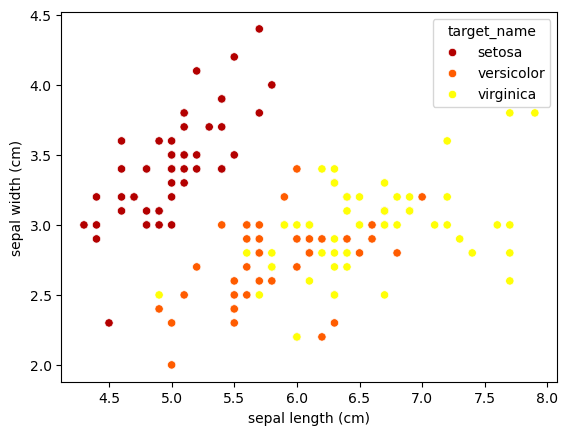

In [547]:
sns.scatterplot(df,x = 'sepal length (cm)',y = 'sepal width (cm)',hue = 'target_name',palette=sns.color_palette('hot',3))
plt.show()

In [548]:
df.columns[:-2]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [549]:
scatter_col = list(df.columns)
scatter_col.remove('target')

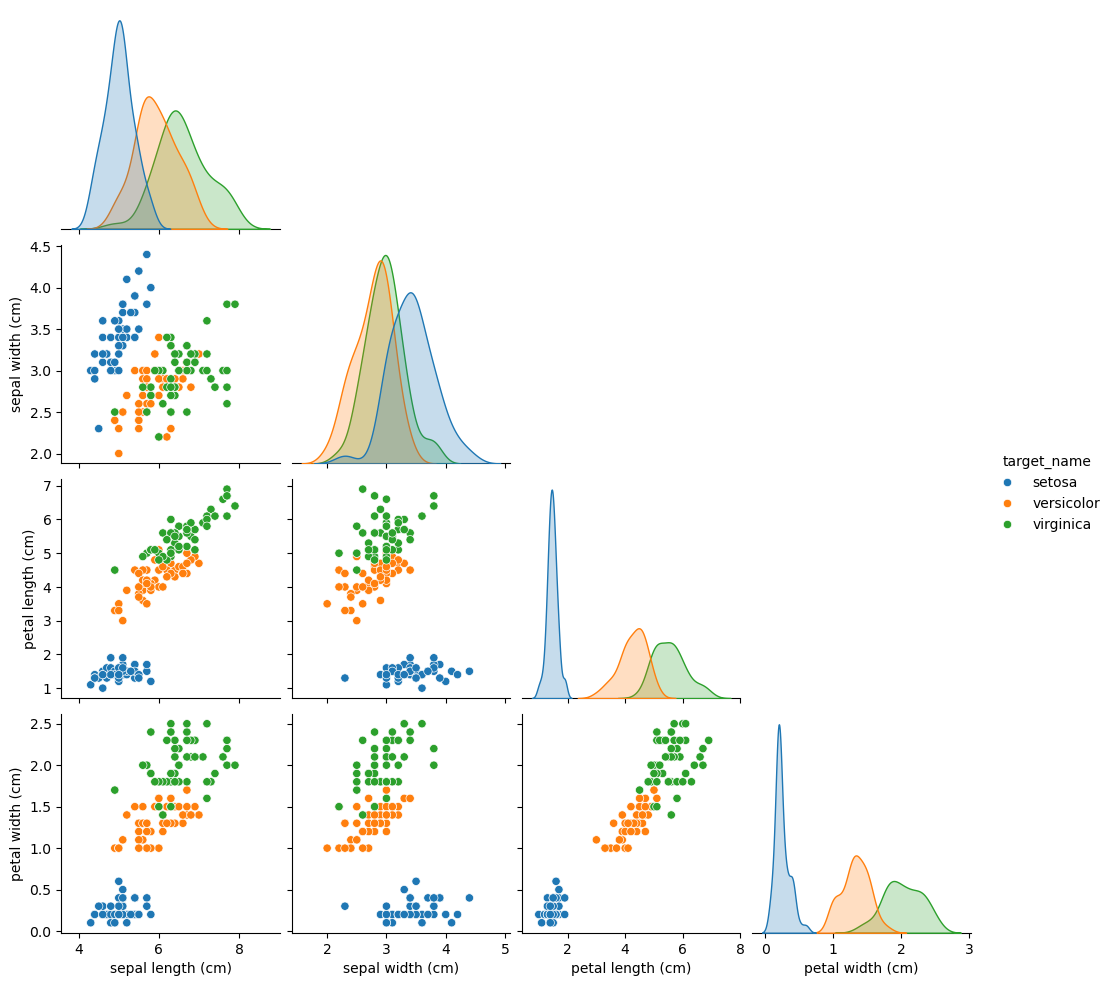

In [550]:
sns.pairplot(data = df[scatter_col],hue = 'target_name',corner=True)
plt.show()

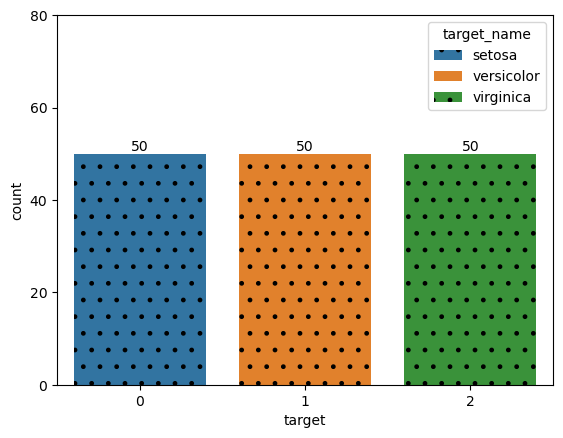

In [551]:
ax = sns.countplot(df , x = 'target',hue = 'target_name',hatch = '.')
for i in ax.containers:
  plt.bar_label(i)
plt.yticks(range(0,100,20))
plt.show()

# Step 4 :Train-Test-Split

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,)

In [553]:
X_train.shape

(120, 4)

In [554]:
X_test.shape

(30, 4)

In [555]:
y_train.shape

(120,)

In [556]:
y_test.shape

(30,)

# step 4 : Model building


In [557]:
model_lr = LogisticRegression()

In [558]:
model_lr.fit(X_train,y_train) # training

LogisticRegression()

In [559]:
y_pred = model_lr.predict(X_test)

In [560]:
y_pred  # model answer

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [561]:
y_test # actual answer

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int64

In [562]:
compare_df = pd.DataFrame({'Actual_y': y_test,'Model_pred_y': y_pred})
compare_df['Actual_flower_name'] = compare_df['Actual_y'].map(dict(zip(range(0,3),iris.target_names)))
compare_df['Predicted_flower_name'] = compare_df['Model_pred_y'].map(dict(zip(range(0,3),iris.target_names)))
compare_df

,Actual_y,Model_pred_y,Actual_flower_name,Predicted_flower_name
73,1,1,versicolor,versicolor
18,0,0,setosa,setosa
118,2,2,virginica,virginica
78,1,1,versicolor,versicolor
76,1,1,versicolor,versicolor
31,0,0,setosa,setosa
64,1,1,versicolor,versicolor
141,2,2,virginica,virginica
68,1,1,versicolor,versicolor
82,1,1,versicolor,versicolor


# step 5 : Confusion Matrix

In [563]:
cm = confusion_matrix(y_test,y_pred)

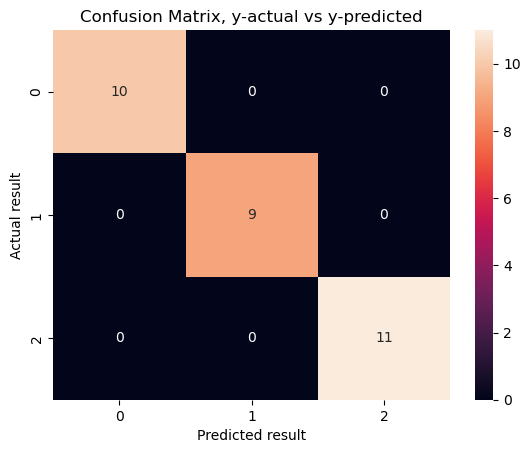

In [564]:
plt.title('Confusion Matrix, y-actual vs y-predicted')
sns.heatmap(cm,annot = True,fmt= '')
plt.xlabel('Predicted result')
plt.ylabel('Actual result')
plt.show()

In [565]:
score  = round(model_lr.score(X_test,y_test)*100,2)
print('Model score is :',score)

Model score is : 100.0


In [566]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [567]:
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
120,6.9,3.2,5.7,2.3,2,virginica


# Step 6 : Predicting the Flower

In [568]:
sepal_length = 3
sepal_width = 4.5
petal_length = 4
petal_width	= 5.3
sample_data = [[sepal_length,sepal_width,petal_length,petal_width]]
ans = model_lr.predict(sample_data)[0]
print('Predicted Flower is : ',iris.target_names[ans])

Predicted Flower is :  virginica


In [569]:
# Designed By : ALTAF HUSAIN DATA ANALYST